In [1]:
import cfe
import scanpy as sc

cfe.settings.backend = "dynverse_docker"

[2025年01月27日 11时50分39秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

数据

AnnData object with n_obs × n_vars = 926 × 1128
    obs: 'c', 'milestone_color', 'milestone'
    var: 'feature_id', 'housekeeping'
    uns: 'cfe', 'pca', 'tsne', 'milestone_colors'
    obsm: 'X_pca', 'X_tsne', 'milestone_network_emb'
    varm: 'PCs'
    layers: 'expression', 'counts'

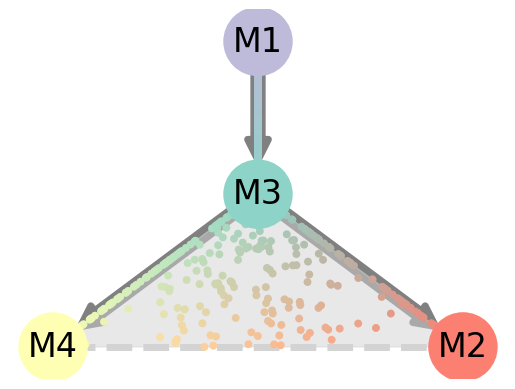

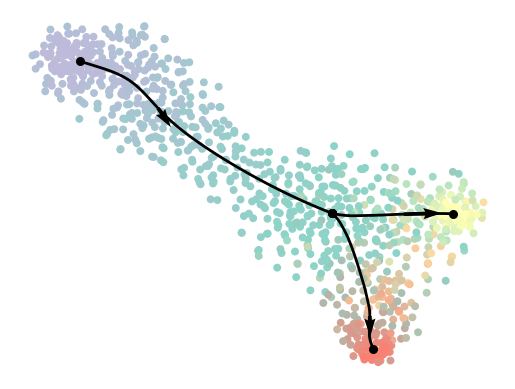

In [2]:
fadata = cfe.data.FateAnnData.read_dynverse_simulation_data()

cluster_key = "milestone_color"
fadata.group_onto_nearest_milestones(cluster_key=cluster_key) # new cluster color
sc.tl.tsne(fadata)

cluster_key_list = ["milestone"]
cfe.plot.plot_graph(fadata, color=cluster_key_list, sc_pl_embedding_kwargs={"title":""}, nx_draw_kwrags={"node_size": 2400, "font_size": 24})
cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list, frameon=False, title="")
fadata

In [ ]:
del fadata.uns["cfe"]
fadata.write_h5ad(save_cfe=False,filename="../tmp/dyntoy_bifurcating_1_fig.h5ad")
# 调用cellxgene查看